# Car Price Prediction  

**This project is a Car Price Prediction project intendted to give you the convenience for car price given the defined conditions**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, SelectKBest
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Load the dataset

In [31]:
df = pd.read_csv('C:\\Users\\pirun\\OneDrive\\Desktop\\Machine_Learning\\Car-_Prediction_Project\\Cars - Cars.csv')

Let's take a look the data information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Let's check its header

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Since the torque column is quite complicated to understand, we will drop it

In [32]:
df = df.drop(columns="torque")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


As of now, we will remove the strings from the mileage, engine, and max_power so that we can analyze the three columns further by using regular expression

In [33]:
df["mileage"] = df["mileage"].str.extract(r'(\d+(\.\d+)?)')[0]
df["engine"] = df["engine"].str.extract(r'(\d+(\.\d+)?)')[0]
df["max_power"] = df["max_power"].str.extract(r'(\d+(\.\d+)?)')[0]

df["engine"] = df["engine"].astype(float)
df["max_power"] = df["max_power"].astype(float)
df["mileage"] = df["mileage"].astype(float)

Lets's check the data information and its header again

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [13]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


As you can see, the strings attached in the three columns have gone

Next, we will exclude the strings representing the details for each of the car's brand, since it' redundant

In [34]:
df['name'] = df['name'].str.split().str.get(0)

Then, check its head

In [17]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


# ****Exploratory Data Analysis****

Exploratory Data Analysis is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. It is crucial in the data preparation phase before applying more formal modeling or hypothesis testing. It helps researchers and data analysts understand the data at hand, its underlying structure, and the relationships between variables.

**Univariate Analysis**

Univariate analysis is a form of data analysis where we examine a single variable or feature without reference to any other. Its primary goal is to describe patterns and characteristics 

In this analysis, we will begin with the analysis of categorical variables by using countplot 

1. Countplot

First of all, let's explore the categories of each feature

In [54]:
categorical_features = ['name', 'fuel', 'seller_type','transmission','owner']

for feature in categorical_features:
    print(f" The {feature} feature contains {df[feature].unique()} unique features \n\n\n")

 The name feature contains ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot'] unique features 



 The fuel feature contains ['Diesel' 'Petrol' 'LPG' 'CNG'] unique features 



 The seller_type feature contains ['Individual' 'Dealer' 'Trustmark Dealer'] unique features 



 The transmission feature contains ['Manual' 'Automatic'] unique features 



 The owner feature contains ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car'] unique features 





Next, Plotting the distribution of each one

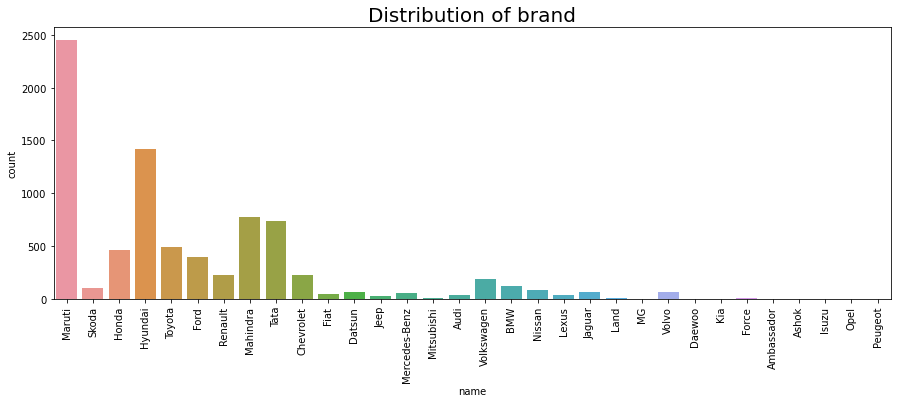

In [35]:
# The distribution of brand

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='name')
plt.title(f'Distribution of brand', fontsize=20)
plt.xticks(rotation=90) 
plt.show()

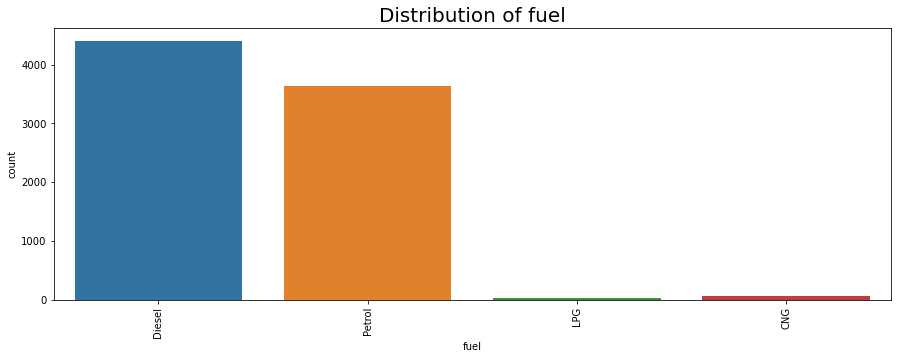

In [39]:
# The distribution of fuel

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='fuel')
plt.title(f'Distribution of fuel', fontsize=20)
plt.xticks(rotation=90)  
plt.show()

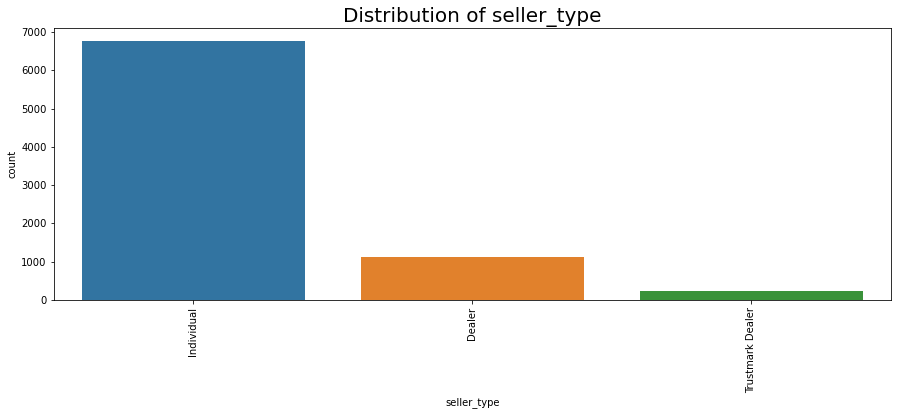

In [40]:
# The distribution of seller_type

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='seller_type')
plt.title(f'Distribution of seller_type', fontsize=20)
plt.xticks(rotation=90)  
plt.show()

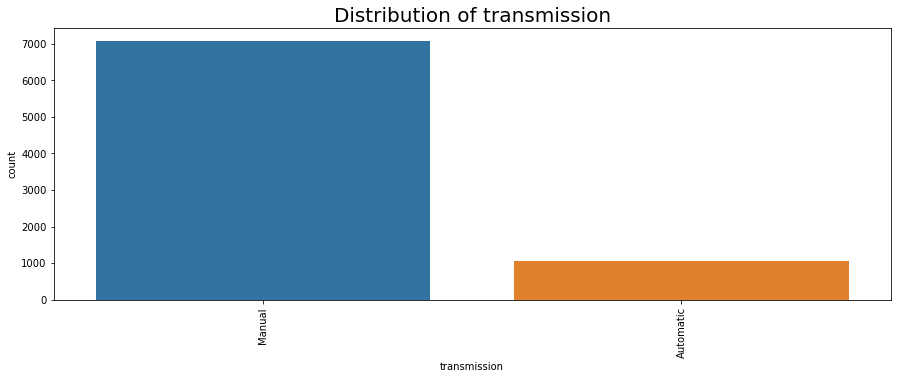

In [41]:
# The distribution of transmission

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='transmission')
plt.title(f'Distribution of transmission', fontsize=20)
plt.xticks(rotation=90)  
plt.show()

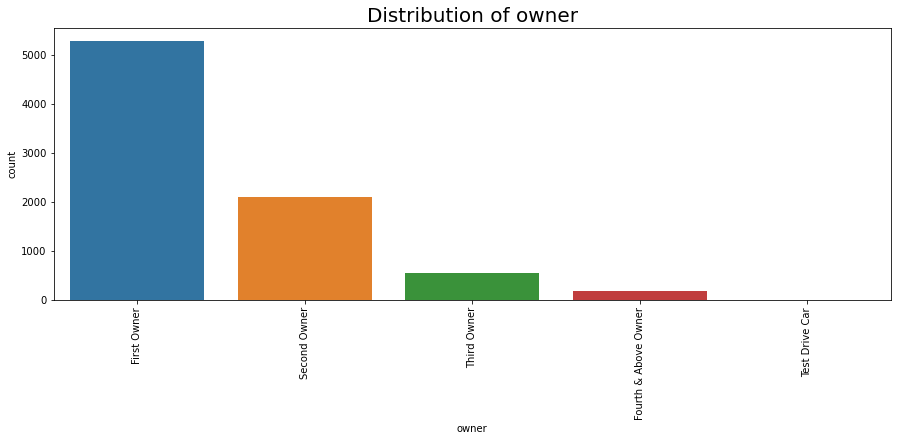

In [42]:
# The distribution of owner

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='owner')
plt.title(f'Distribution of owner', fontsize=20)
plt.xticks(rotation=90)  
plt.show()

Next, we are going to plot the continuous variables

2. Distributionplot

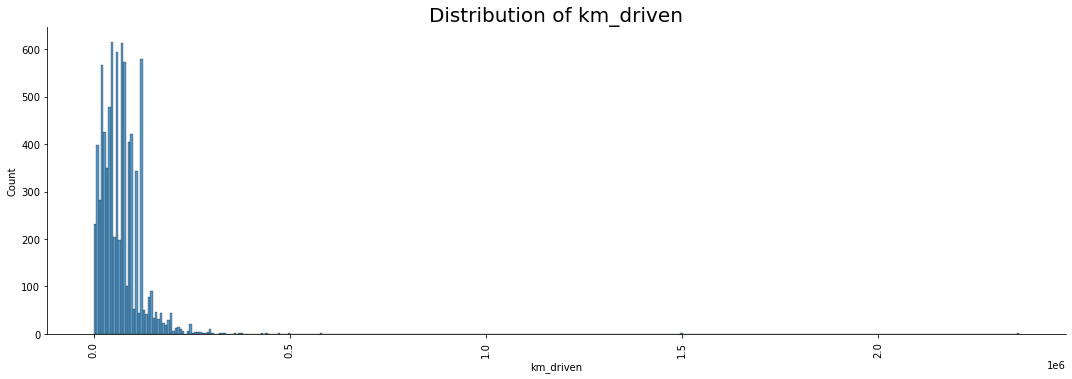

In [48]:
# The distribution of km_driven

sns.displot(data=df, x='km_driven', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of km_driven', fontsize=20)
plt.xticks(rotation=90)
plt.show()

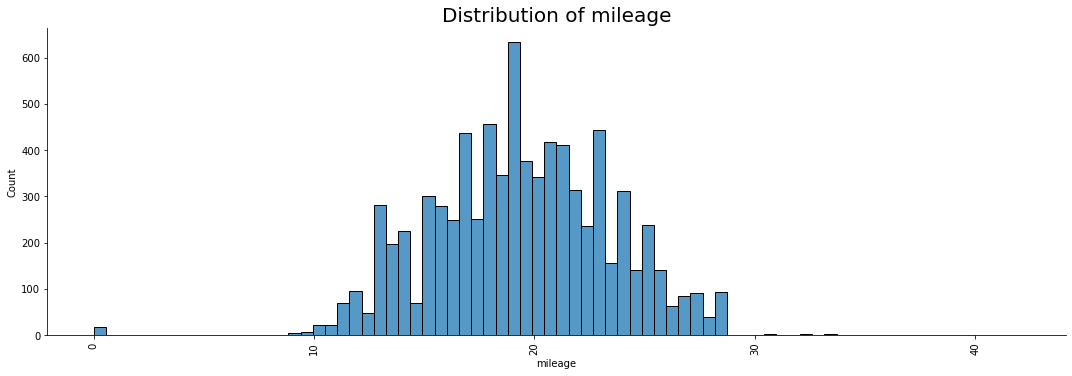

In [50]:
# The distribution of mileage

sns.displot(data=df, x='mileage', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of mileage', fontsize=20)
plt.xticks(rotation=90)
plt.show()

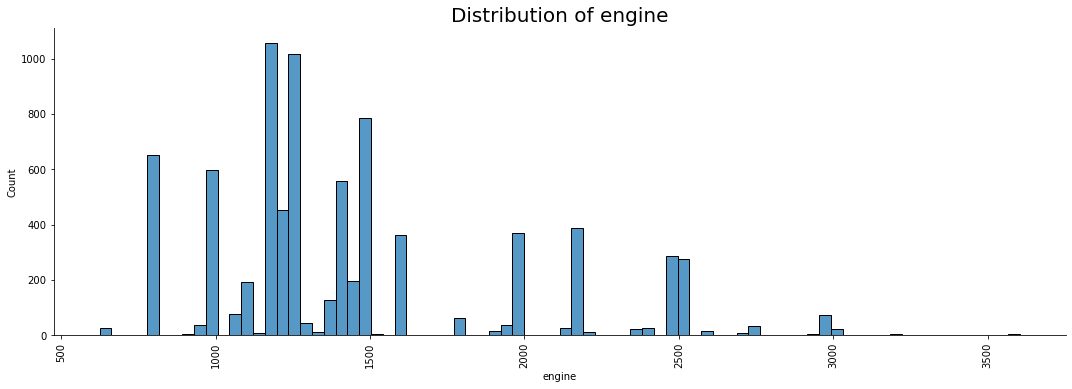

In [51]:
# The distribution of engine

sns.displot(data=df, x='engine', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of engine', fontsize=20)
plt.xticks(rotation=90)
plt.show()

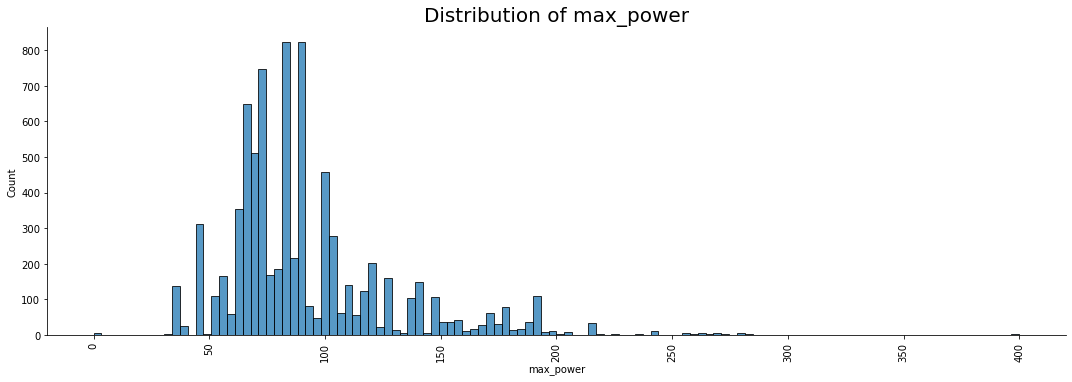

In [52]:
# The distribution of max_power

sns.displot(data=df, x='max_power', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of max_power', fontsize=20)
plt.xticks(rotation=90)
plt.show()

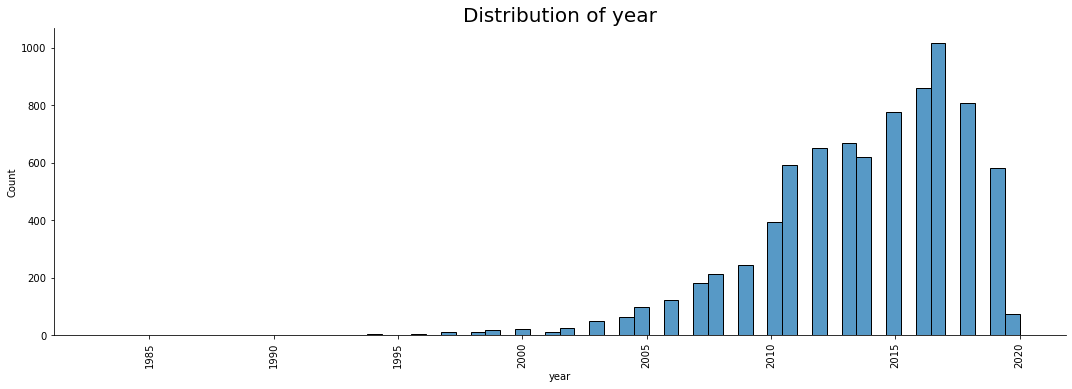

In [53]:
# The distribution of year

sns.displot(data=df, x='year', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of year', fontsize=20)
plt.xticks(rotation=90)
plt.show()

**Multivariate Analysis**

Multivariate analysis refers to any statistical technique used to analyze data that arises from more than one variable. This can encompass a broad range of techniques, as the analysis is applied to datasets where multiple measurements are made on each observation.

In this analysis,we will explore the relationships between selling_price and the features in order to see if there are correlations or patterns among them 

1. Boxplot

Boxplot is a standardized way of displaying the distribution of data based on a five-number summary: the minimum, first quartile (Q1), median, third quartile (Q3), and the maximum. It's a way to visualize the central tendency, variability, and skewness of a data distribution.

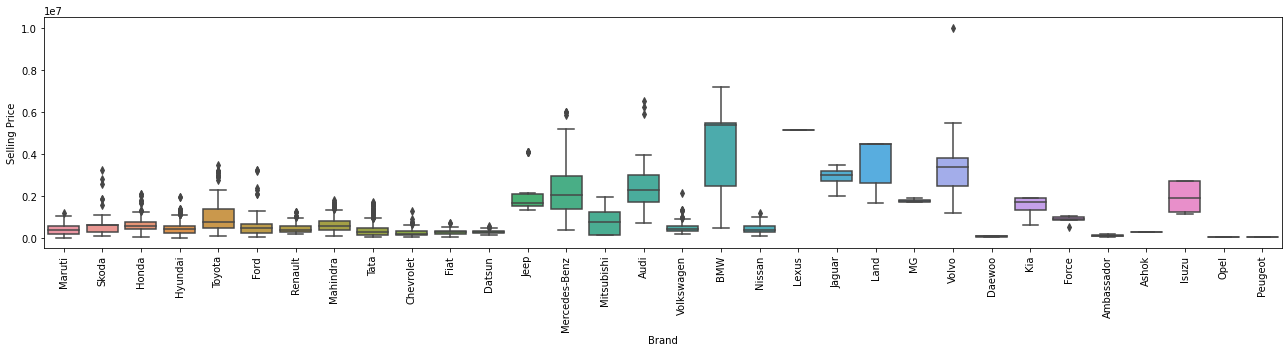

In [59]:
# Let's try bar plot on "brand"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["name"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("Brand")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

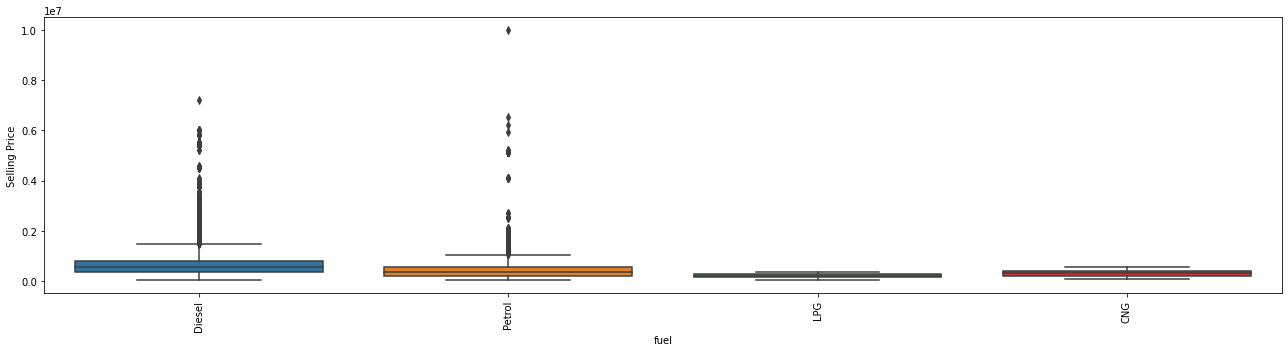

In [62]:
# Let's try bar plot on "fuel"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["fuel"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("fuel")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

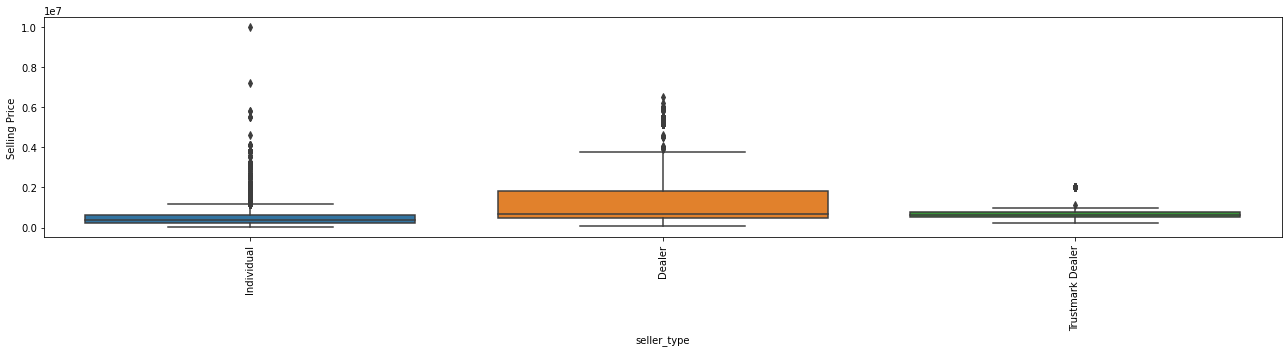

In [63]:
# Let's try bar plot on "seller_type"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["seller_type"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("seller_type")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

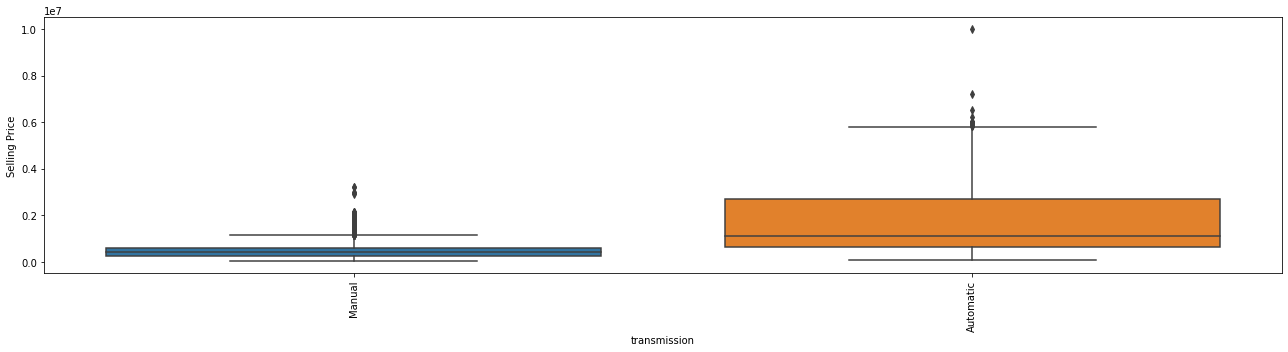

In [65]:
# Let's try bar plot on "transmisson"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["transmission"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("transmission")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

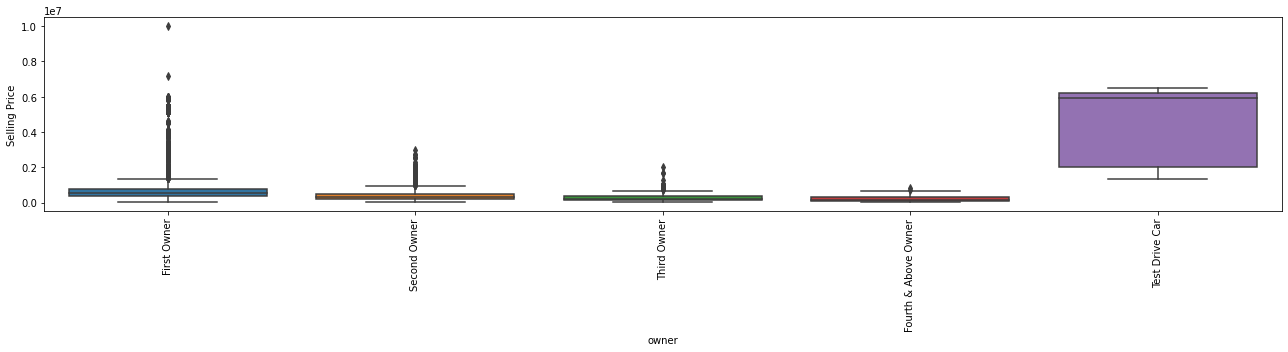

In [66]:
# Let's try bar plot on "owner"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["owner"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("owner")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

2. Scatter Plot

A scatter plot (or scatterplot) is a graphical representation that uses dots to display values for two variables for a set of data. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe and display relationships between two numeric variables.

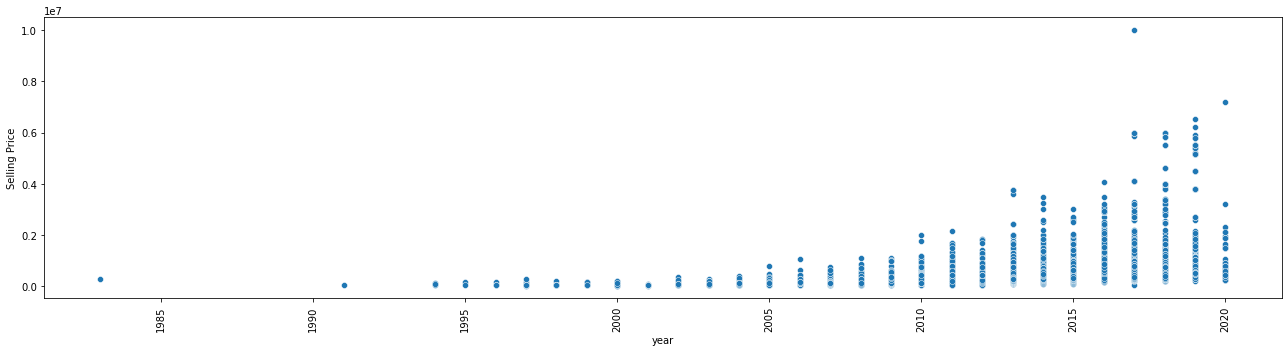

In [68]:
# Let's try bar plot on "year"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["year"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("year")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

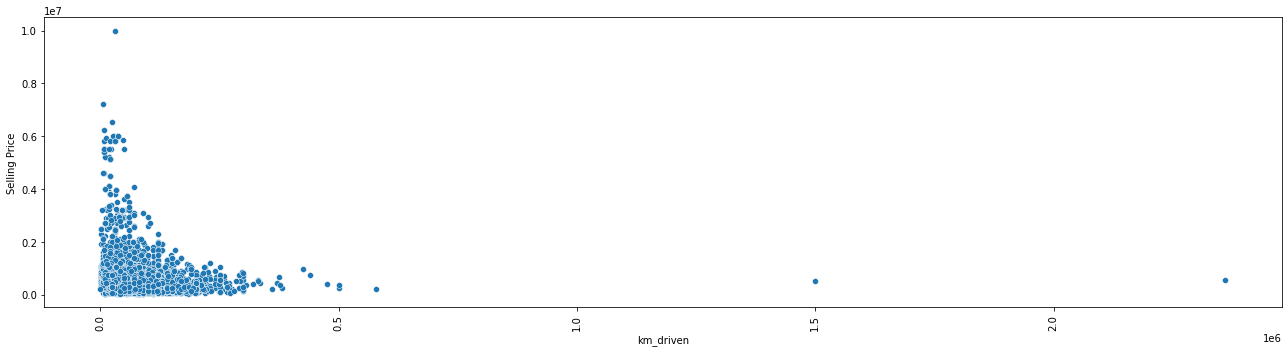

In [69]:
# Let's try bar plot on "km_driven"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["km_driven"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("km_driven")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

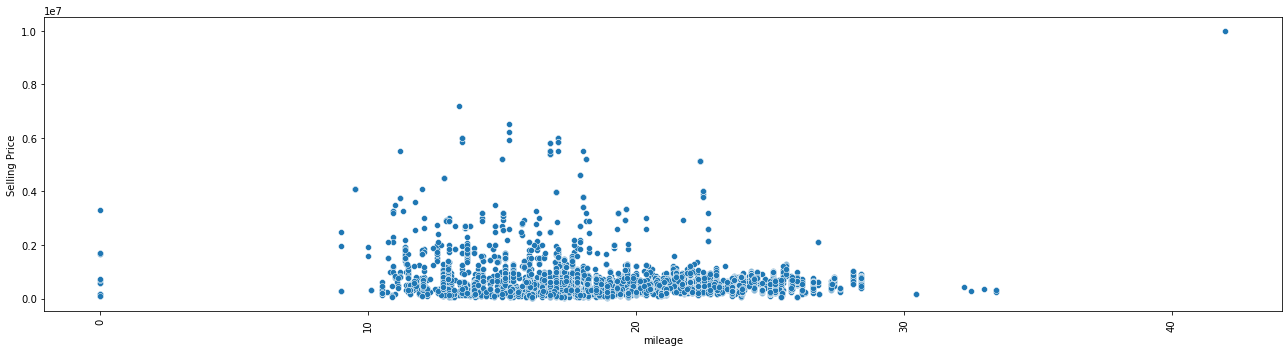

In [70]:
# Let's try bar plot on "mileage"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["mileage"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("mileage")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

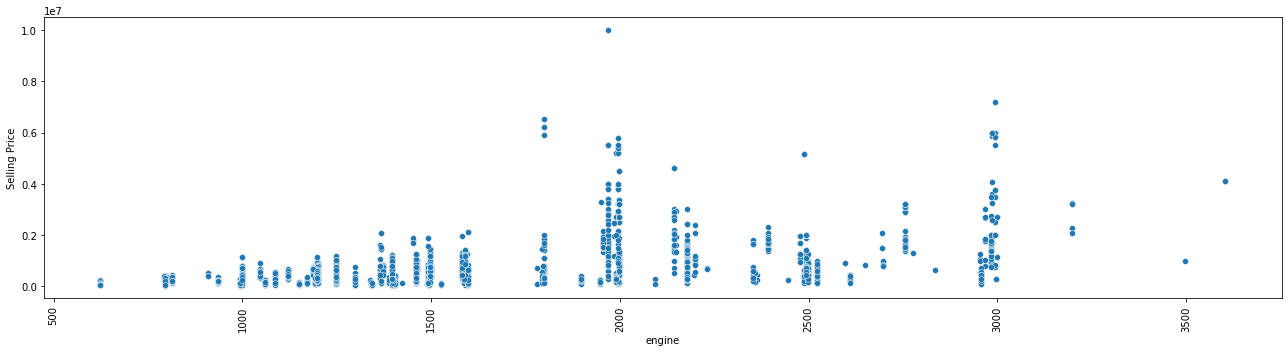

In [71]:
# Let's try bar plot on "mileage"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["engine"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("engine")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

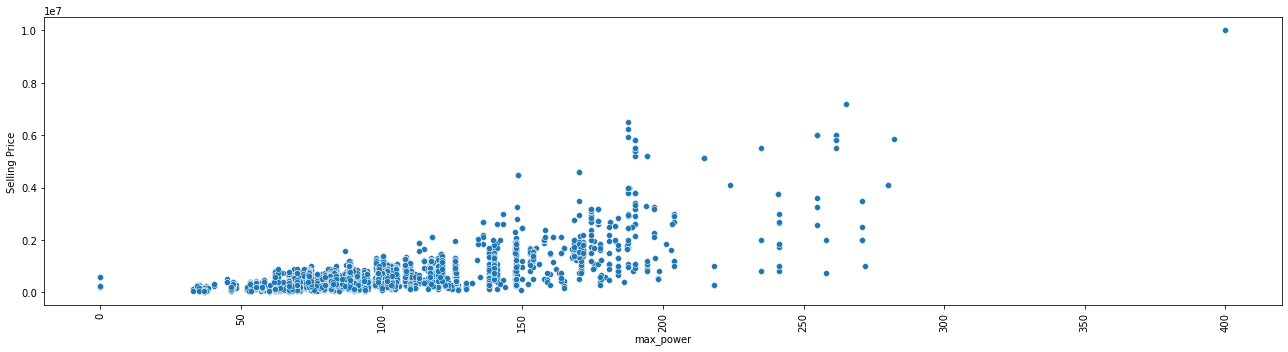

In [72]:
# Let's try bar plot on "max_power"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["max_power"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("max_power")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

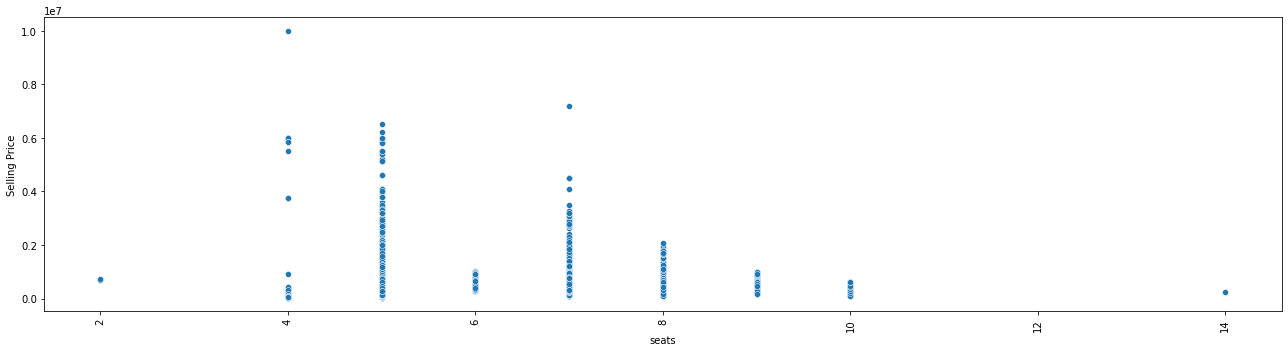

In [73]:
# Let's try bar plot on "max_power"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["seats"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("seats")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

**Other interesting analysis**

1. The relationships between fueltype and mileage

In this analysis, we will be plotting to explore the relationships between fuel type and mileage, since it's essential to see how much mileage each fuel type consume

         count       mean       std   min    25%   50%    75%    max
fuel                                                                
CNG       53.0  24.165660  5.422322  10.9  21.94  26.2  26.60  33.44
Diesel  4299.0  19.642624  4.624294   0.0  15.96  20.0  23.20  28.40
LPG       35.0  18.577143  5.153202  10.9  13.45  17.3  23.65  26.20
Petrol  3520.0  19.082301  3.047539   0.0  17.30  18.9  20.92  42.00


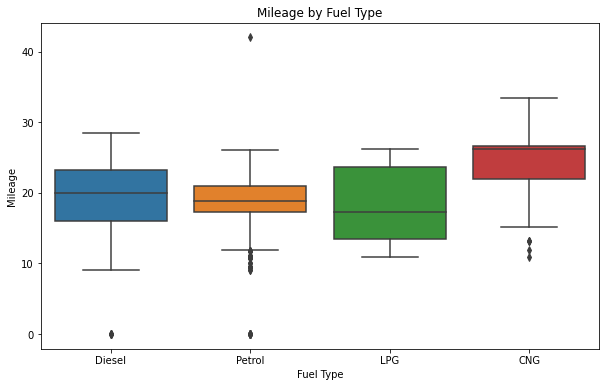

In [75]:
# Plotting to explore the relationship between fuel type and mileage

# Grouping data by fuel type and calculating mean mileage
grouped_data = df.groupby('fuel')['mileage'].describe()
print(grouped_data)

# Boxplot for mileage based on fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='mileage', data=df)
plt.title('Mileage by Fuel Type')
plt.ylabel('Mileage')
plt.xlabel('Fuel Type')
plt.show()

According to the data, there are 6 points where we can make an insight analysis

1. Fuel Types and Data Size
   . There are 4 fuel types: CNG, Diesel, LPG, and Petrol.
   . The data size (count) for Diesel and Petrol is considerably larger than for CNG and LPG. Hence, statistics for Diesel      and Petrol might be more reliable due to the larger sample size.
   
2. Central Tendency (Mean and Median)
   . CNG vehicles seem to have the highest average and median fuel efficiency, while LPG vehicles have the lowest.
   
3. Variability (Standard Deviation)
   . Petrol vehicles' fuel efficiency is more consistent compared to other fuel types, whereas CNG and LPG vehicles show        higher variability.
   
4. Spread (IQR)
   . LPG vehicles show the highest spread in fuel efficiency for the middle 50% of data, while Petrol vehicles have the          least.
   
5. Outliers and Range
   . The minimum efficiency for both Diesel and Petrol is 0.0, which could be an error or represent non-running vehicles.
   . The maximum efficiency for Petrol vehicles is notably high at 42.0, much higher than its 75th percentile value,            suggesting potential outliers or high-performance vehicles.
   
6. Insight and Further Investigation
   . CNG vehicles, on average, might be more fuel-efficient, but they also have a wider variability.
   . Diesel and Petrol are the most common fuels, with Diesel vehicles showing slightly better average efficiency than          Petrol.
   . The minimum values, especially for Diesel and Petrol, warrant further investigation.
   . The notably high maximum for Petrol could be investigated to determine if it's an outlier or if there are specific          models with high fuel efficiency.

2. The influences of fuel type on the saleprice

         count           mean            std      min       25%       50%  \
fuel                                                                        
CNG       57.0  301017.491228  111582.298949  80000.0  200000.0  320000.0   
Diesel  4402.0  791452.921627  908894.768774  40000.0  350000.0  550000.0   
LPG       38.0  200421.052632   84921.468199  54000.0  148250.0  195500.0   
Petrol  3631.0  462441.061691  624788.835690  29999.0  200000.0  345000.0   

             75%         max  
fuel                          
CNG     390000.0    545000.0  
Diesel  800000.0   7200000.0  
LPG     275000.0    375000.0  
Petrol  550000.0  10000000.0  


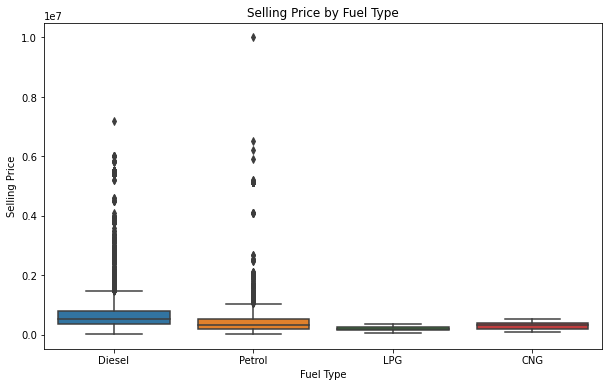

In [76]:
# This is to explore how fuel type influences the resale price

# Grouping data by fuel type and calculating mean selling price
grouped_fuel_data = df.groupby('fuel')['selling_price'].describe()
print(grouped_fuel_data)


# Boxplot for selling price based on fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Selling Price by Fuel Type')
plt.ylabel('Selling Price')
plt.xlabel('Fuel Type')
plt.show()

According to the data, we can summarize as below:

1. Further Analysis:

   . Why are Diesel vehicles, on average and median, more expensive than the others ?
   
   . Are the-end Diesel and Petro vehicles luxury brands or special models, since the selling price are relatively higher        than the other two
   
   . How does the age ot model year of the vehicle influence its price
   
2. Recommendations:

   . If someone is looking for budget-friendly options, LPG vehicles might be a good choice
   
   . For a typical range of prices without extreme highs or lows, CNG could be a viable options

3. The relationships between the brand km_driven

                count           mean           std       min       25%  \
name                                                                     
Ambassador        4.0   82500.000000  17078.251277   60000.0   75000.0   
Ashok             1.0  200000.000000           NaN  200000.0  200000.0   
Audi             40.0   53896.550000  42624.488641    7800.0   29000.0   
BMW             120.0   30269.458333  35151.876004    5000.0    7500.0   
Chevrolet       230.0   79785.373913  40433.918046   13500.0   55250.0   
Daewoo            3.0   81317.000000  48662.269439   46951.0   53475.5   
Datsun           65.0   36342.861538  26311.951296    1300.0   19000.0   
Fiat             47.0   84630.893617  43355.022098   20000.0   55000.0   
Force             6.0   55546.500000  61182.713028   13000.0   14750.0   
Ford            397.0   72902.780856  44707.465871    2600.0   39000.0   
Honda           467.0   60008.402570  39973.032542    1000.0   30000.0   
Hyundai        1415.0   64823.558304  

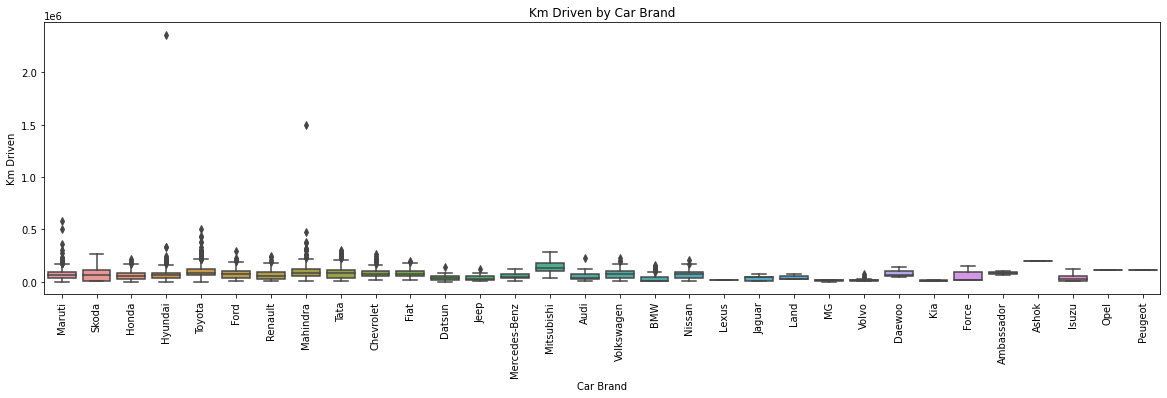

In [80]:
# This is to delve into the relationship between the brand or car type and how much it's typically driven

# Grouping data by car brand and calculating mean km driven
grouped_brand_data = df.groupby('name')['km_driven'].describe()
print(grouped_brand_data)

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for km driven based on car brand
plt.figure(figsize=(20, 5))
sns.boxplot(x='name', y='km_driven', data=df)
plt.title('Km Driven by Car Brand')
plt.ylabel('Km Driven')
plt.xlabel('Car Brand')
plt.xticks(rotation=90)
plt.show()

4. The distrinbution of car brands based on number of seats

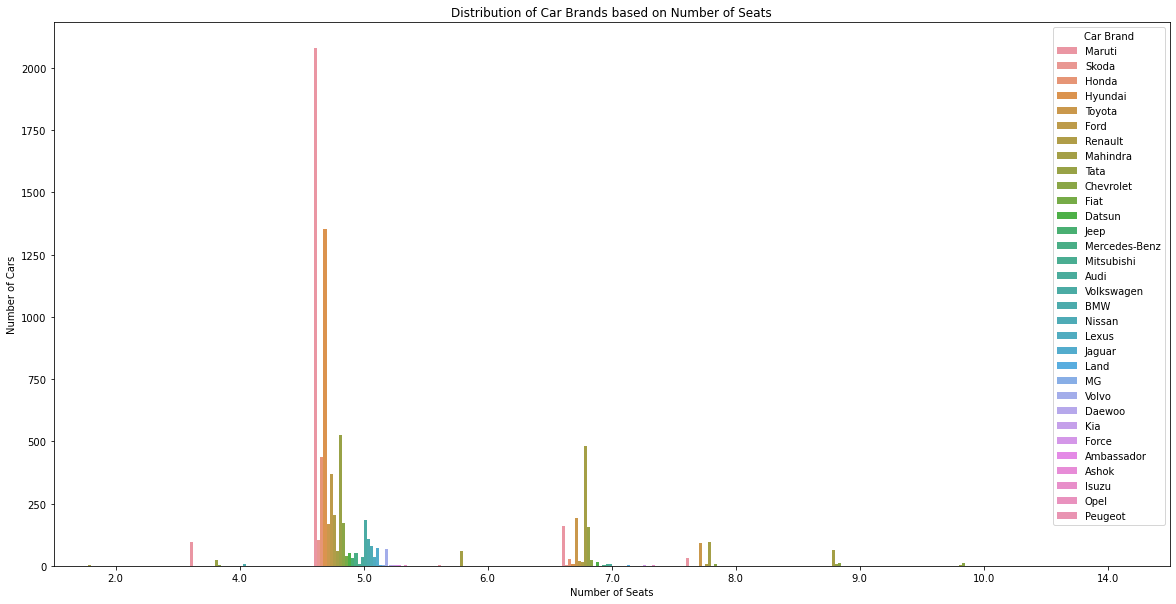

In [84]:
# Bar plot for distribution of car brands based on number of seats
plt.figure(figsize=(20, 10))
sns.countplot(x='seats', hue='name', data=df)
plt.title('Distribution of Car Brands based on Number of Seats')
plt.ylabel('Number of Cars')
plt.xlabel('Number of Seats')
plt.legend(title='Car Brand', loc='upper right')
plt.show()

5. The distributions of each owner type by selling price to see how many cars each price has

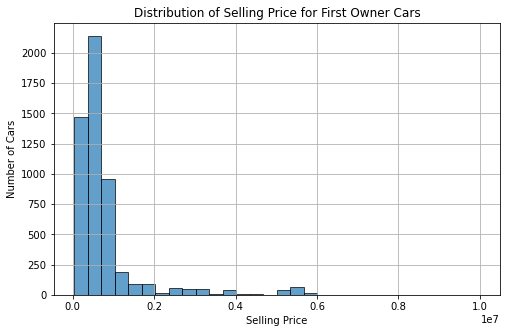

In [96]:
# The distribution of first owner

# Filter data for first owners
df_owner1 = df[df['owner'] == "First Owner"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30) 
plt.title('Distribution of Selling Price for First Owner Cars')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

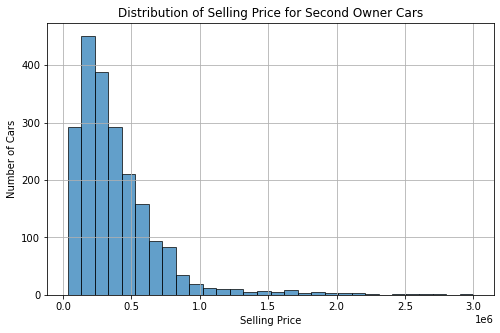

In [97]:
# The distribution of second owner

# Filter data for first owners
df_owner1 = df[df['owner'] == "Second Owner"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30) 
plt.title('Distribution of Selling Price for Second Owner Cars')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

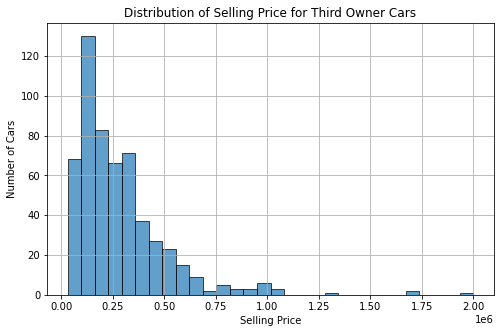

In [98]:
# The distribution of Third Owner

# Filter data for first owners
df_owner1 = df[df['owner'] == "Third Owner"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30)  
plt.title('Distribution of Selling Price for Third Owner Cars')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

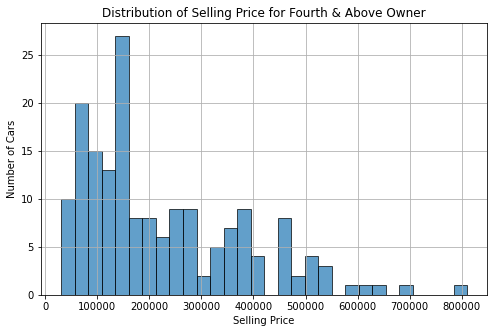

In [99]:
# The distribution of Fourth & Above Owner

# Filter data for first owners
df_owner1 = df[df['owner'] == "Fourth & Above Owner"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30)  
plt.title('Distribution of Selling Price for Fourth & Above Owner')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

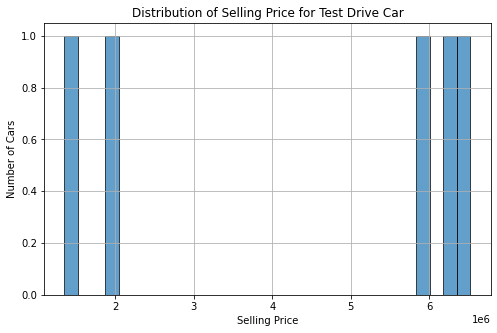

In [100]:
# The distribution of Test Drive Car

# Filter data for first owners
df_owner1 = df[df['owner'] == "Test Drive Car"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30)  
plt.title('Distribution of Selling Price for Test Drive Car')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

6. The distribution of each brand by year

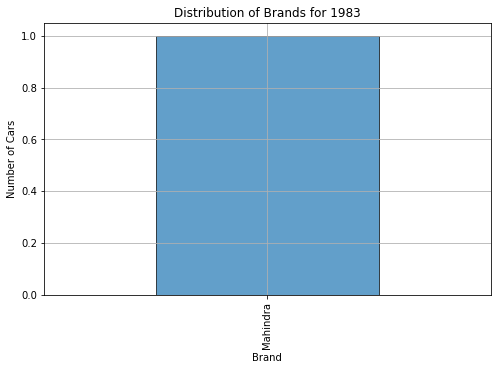

In [105]:

year = 1983
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

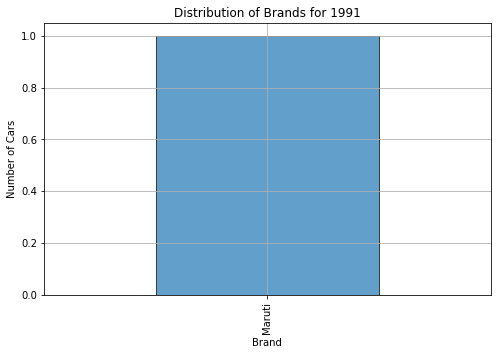

In [106]:

year = 1991
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

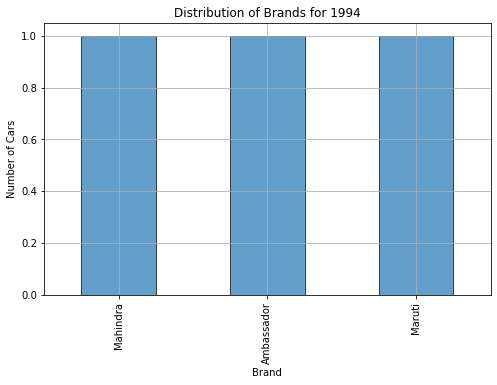

In [107]:

year = 1994
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

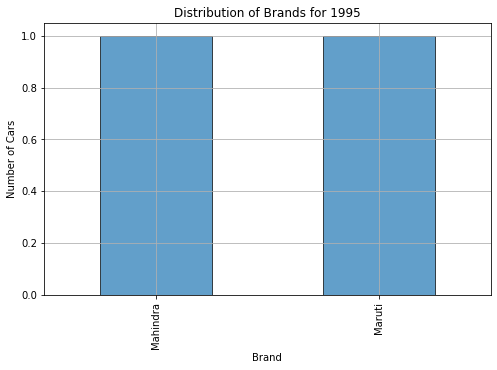

In [108]:

year = 1995
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

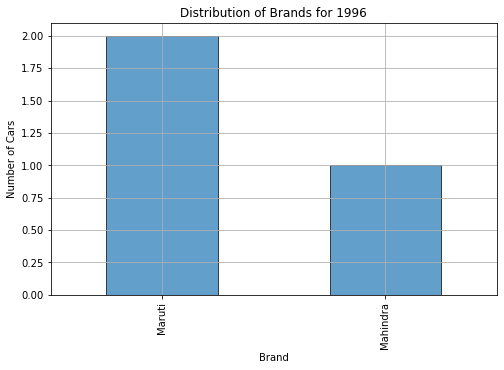

In [109]:

year = 1996
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

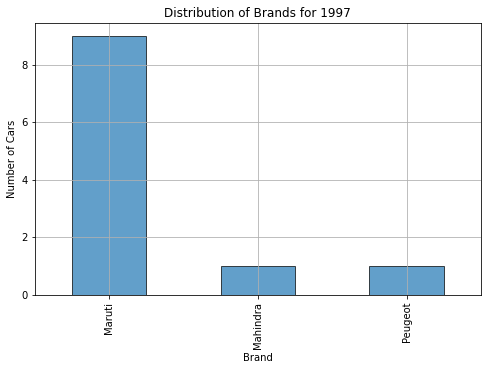

In [110]:

year = 1997
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

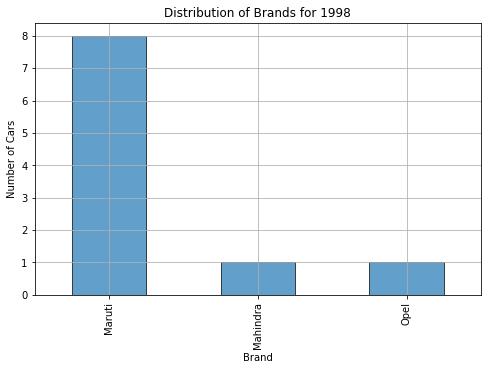

In [111]:

year = 1998
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

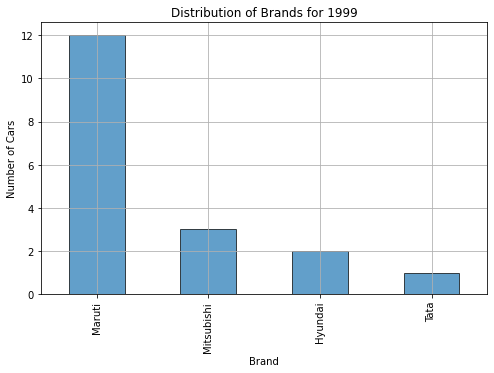

In [112]:

year = 1999
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

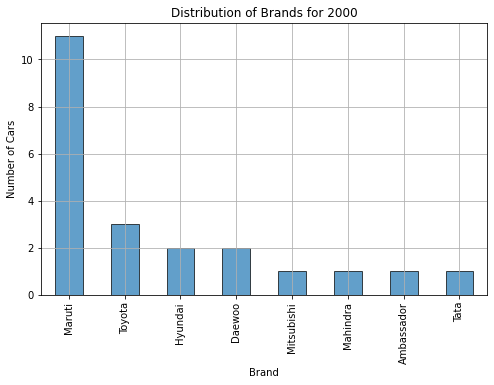

In [113]:

year = 2000
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

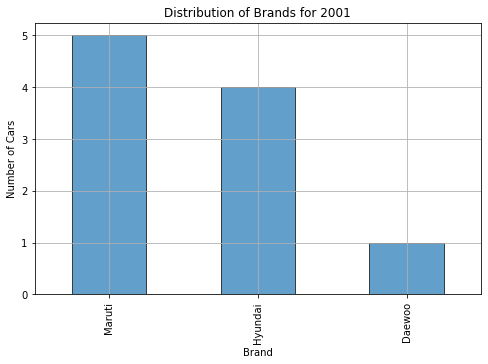

In [114]:

year = 2001
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

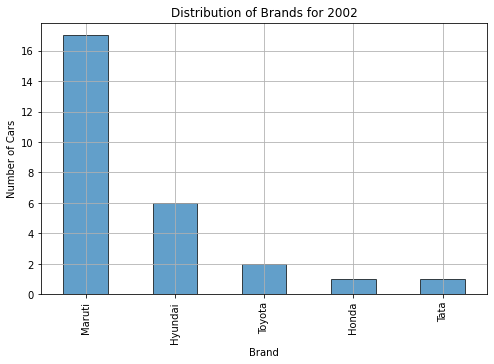

In [115]:

year = 2002
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

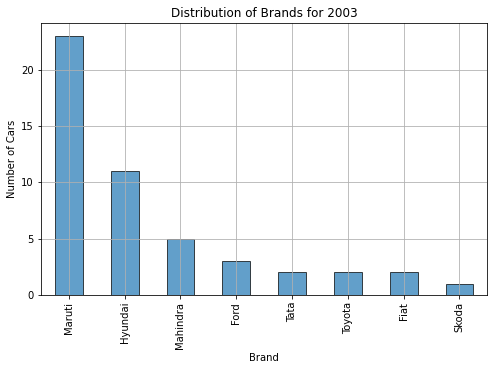

In [116]:

year = 2003
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

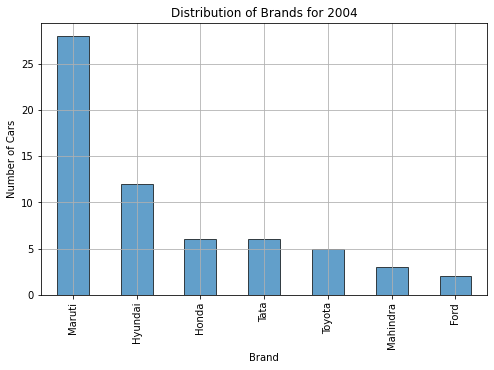

In [117]:

year = 2004
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

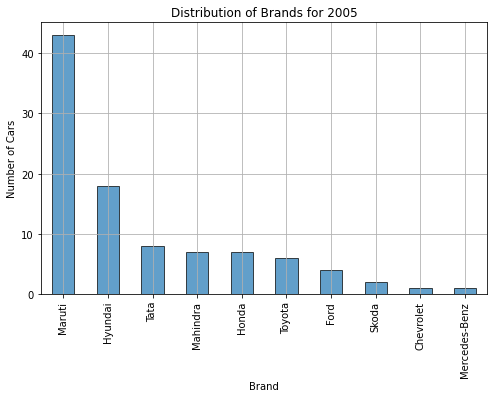

In [118]:

year = 2005
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

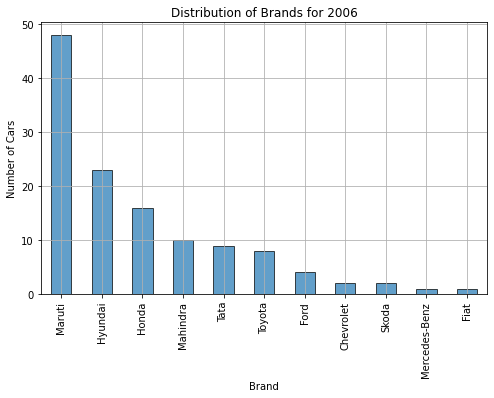

In [119]:

year = 2006
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

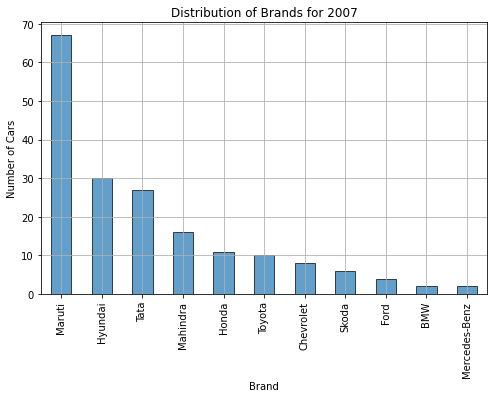

In [120]:

year = 2007
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

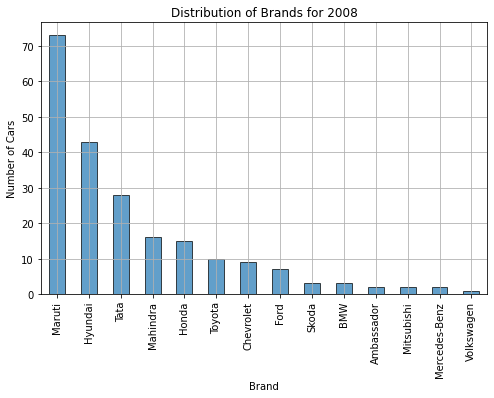

In [121]:

year = 2008
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

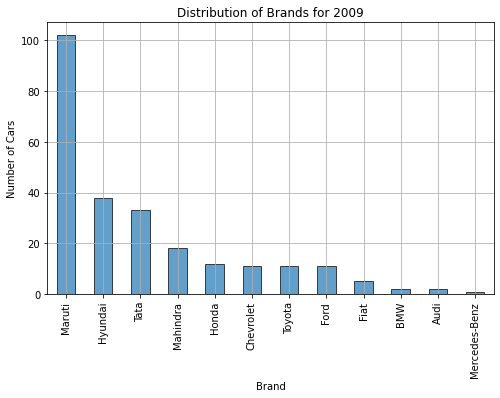

In [122]:

year = 2009
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

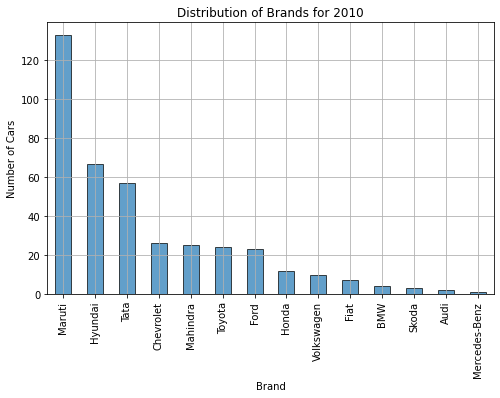

In [123]:

year = 2010
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

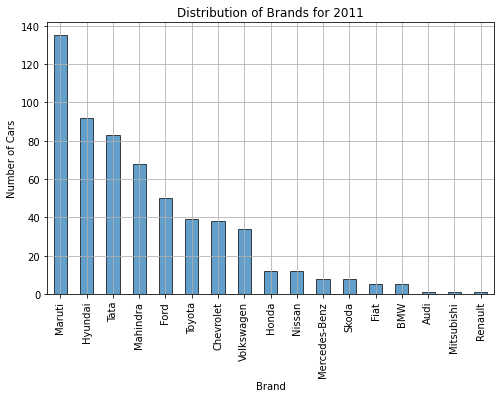

In [124]:

year = 2011
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

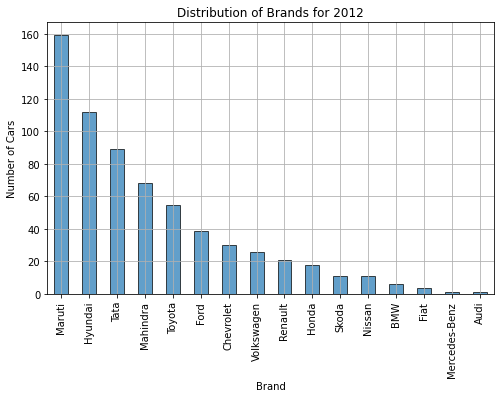

In [125]:

year = 2012
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

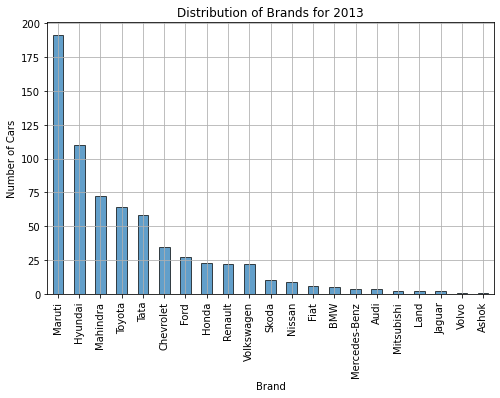

In [126]:

year = 2013
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

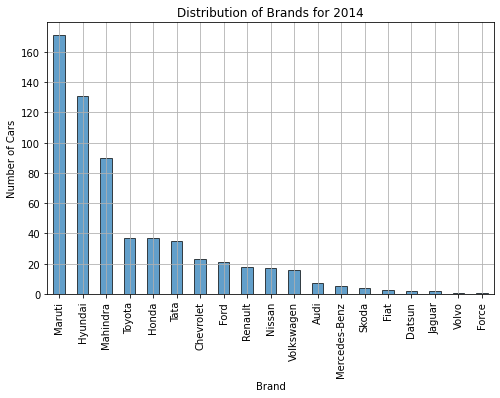

In [127]:

year = 2014
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

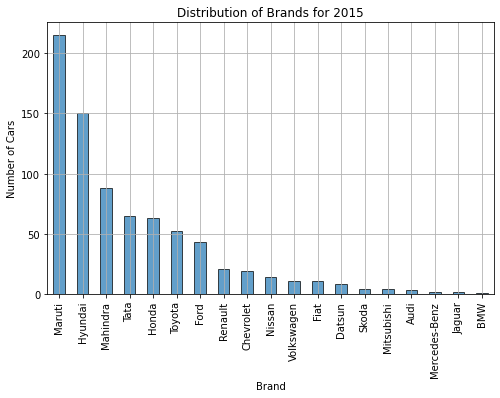

In [128]:

year = 2015
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

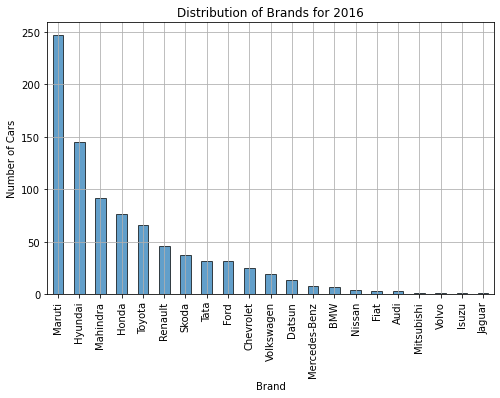

In [129]:

year = 2016
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

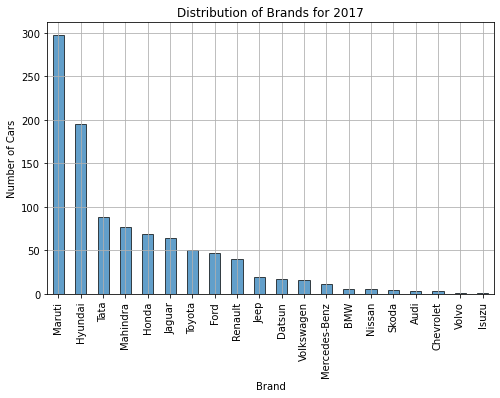

In [130]:

year = 2017
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

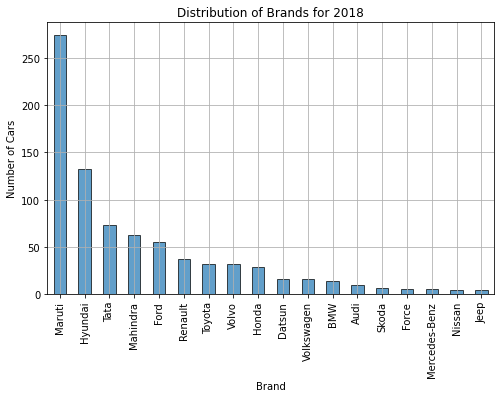

In [131]:

year = 2018
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

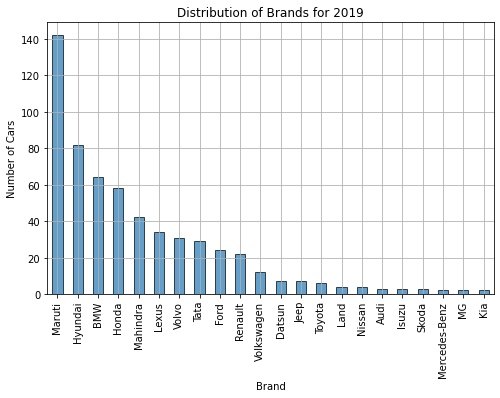

In [132]:

year = 2019
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

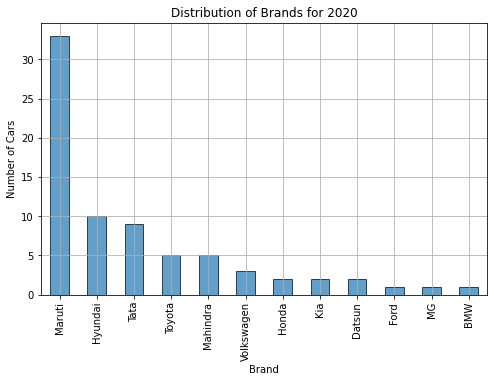

In [133]:

year = 2020
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

7. The distribution of average price by brand

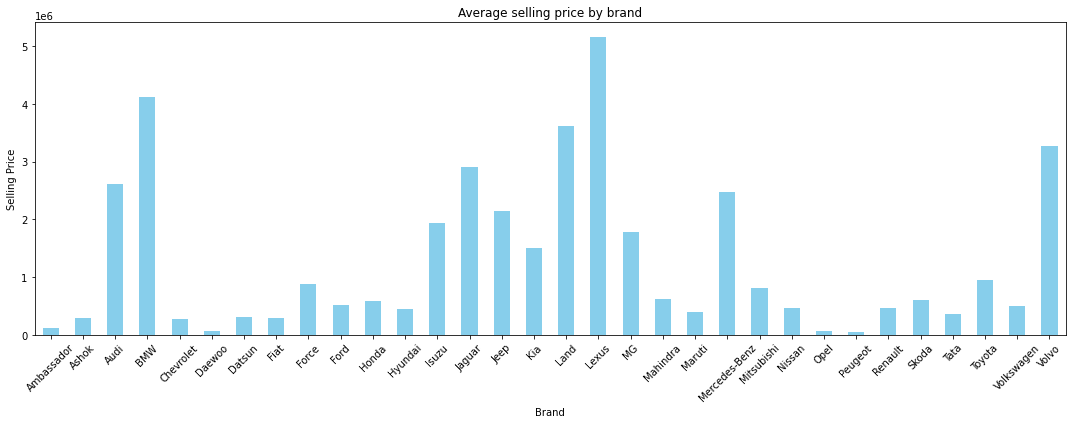

In [134]:
# The average price by brand

# The average price by brand
avg_owner_over_sellingprice = df.groupby('name')['selling_price'].mean()

# Set the figure size
plt.figure(figsize=(15,6))  # Here, 10 is the width and 6 is the height

# Plotting
avg_owner_over_sellingprice.plot(kind='bar', color='skyblue')
plt.title('Average selling price by brand')  # Adjusted the title to reflect the correct variable
plt.ylabel('Selling Price')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#By adjusting the figsize values, you can achieve the desired plot size. Increase or decrease the values as needed.

**Correlation Matrix**

A correlation matrix is a table that displays the correlation coefficients between multiple variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have perfect positive correlation, the value would be 1, if they have perfect negative correlation, the value would be -1, and if they have no correlation, the value would be 0.

<AxesSubplot:>

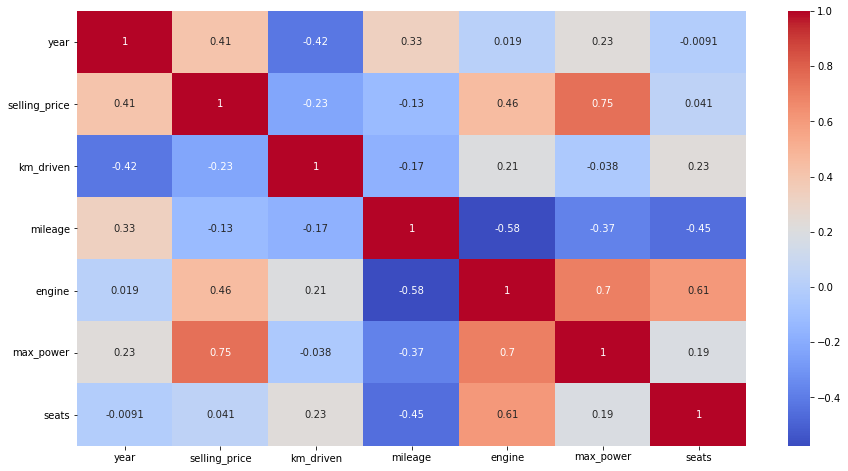

In [18]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

Let's tramsform our categorical features into numerics by using   **LabelEncoder**

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

df["seller_type"] = le.fit_transform(df["seller_type"])
df["fuel"] = le.fit_transform(df["fuel"])
df["transmission"] = le.fit_transform(df["transmission"])
df["name"] = le.fit_transform(df["name"])

In [37]:
print("The label of sellertype are of :",df["seller_type"].unique(),"\n")
print("The label of fuel are of :",df["fuel"].unique(),"\n")
print("The label of transmission are of :",df["transmission"].unique(),"\n")
print("The label of name are of :",df["name"].unique(),"\n")

The label of sellertype are of : [1 0 2] 

The label of fuel are of : [1 3 2 0] 

The label of transmission are of : [1 0] 

The label of name are of : [20 27 10 11 29  9 26 19 28  4  7  6 14 21 22  2 30  3 23 17 13 16 18 31
  5 15  8  0  1 12 24 25] 



In [41]:
print("The label of sellertype are of :",df["seller_type"].dtype,"\n")
print("The label of fuel are of :",df["fuel"].dtype,"\n")
print("The label of transmission are of :",df["transmission"].dtype,"\n")
print("The label of name are of :",df["name"].dtype,"\n")

The label of sellertype are of : int32 

The label of fuel are of : int32 

The label of transmission are of : int32 

The label of name are of : int32 



In [38]:
# Only for owner, we will transform the data into 1-5 categories

order = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner':4, 'Test Drive Car':5}
df['owner'] = df['owner'].map(order)

In [40]:
# Let's check its unique values
df['owner'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [42]:
# Now let's check its header again
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,3,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,3,1,1,1,16.10,1298.0,88.20,5.0


Let's plot correlation matrix again

<AxesSubplot:>

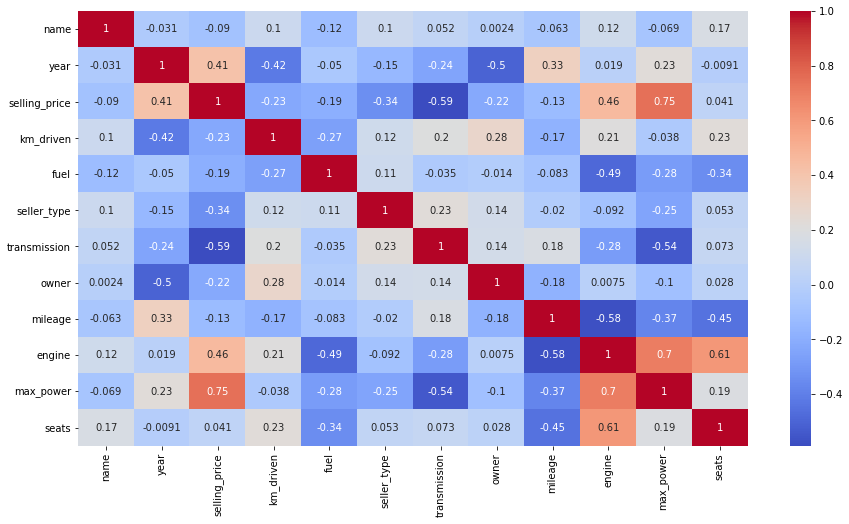

In [43]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

According to the matrix, the potential features are year, transmission, engine, and max_power.
However, it can be seen that there is a relatively high positive correlation between the max_power and the engine, so we will select max_power as one of the candidate features since it shows a significant correlation with the selling_price in a positive way.

In the next section, we're gonna use three more algorithms to determine which features are important.

**Predictive Power Score**

Predictive Power Score (PPS) is an alternative to the correlation coefficient for examining the relationship between two variables. While correlation measures linear relationships between two continuous variables, PPS can detect and quantify more types of relationships (linear, non-linear, and categorical) and can be used for different types of variables (categorical, continuous, etc.).

<AxesSubplot:xlabel='x', ylabel='y'>

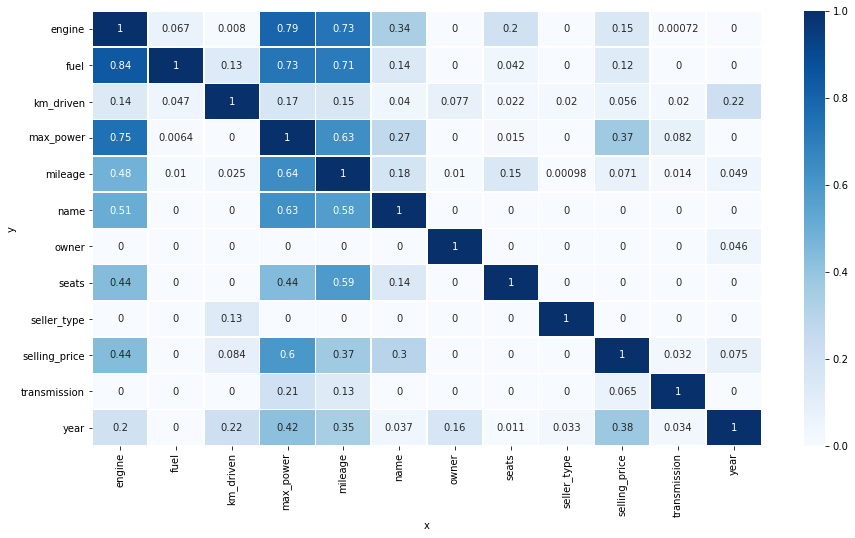

In [44]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
#dfcopy.drop(['country', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

As from the data given, we can conclude that the potential important features are max_power, mileage.

**ANOVA Test**

ANOVA (Analysis of Variance) can be used for feature selection, especially when dealing with numerical output (dependent) variables and categorical input (independent) variables. The basic idea behind using ANOVA for feature selection is to determine which features have the most significant impact on the variance of the output variable.

In [50]:
# Filling NA values, since null values are included in the dataset

df["mileage"].fillna(df["mileage"].mean(), inplace=True)
df["engine"].fillna(df["engine"].median(), inplace=True)
df["max_power"].fillna(df["max_power"].median(), inplace=True)
df["seats"].fillna(df["seats"].median(), inplace=True)

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Data prep (assuming df is already defined)
X = df.drop(columns="selling_price")
y = df["selling_price"]

selector = SelectKBest(score_func=f_classif, k=3)  # selecting top 2 features
X_new = selector.fit_transform(X, y)

# Get the features that were selected:
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features.tolist()}")
#The crucial change is using X.columns which gives you the column names of the DataFrame X that you passed to fit_transform().

Selected Features: ['year', 'transmission', 'max_power']


**Using Mutual Information**

Mutual Information (MI) is a measure from information theory that quantifies the amount of information obtained about one random variable through observing another random variable. In the context of feature selection, it helps determine how much information a particular feature provides about the target variable. Features that provide more information about the target are deemed more relevant.

In [52]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

# Select top 5 features based on mutual information
selector = SelectKBest(mutual_info_regression, k=4)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features using Mutual Information:", selected_features)

Selected features using Mutual Information: Index(['year', 'mileage', 'engine', 'max_power'], dtype='object')


**Conclusions**

Based on the result, we can conclude that the important features are year, max_power, and mileage

# **Feature Selection**

In [4]:
# Let's load the dataset again
df = pd.read_csv('C:\\Users\\pirun\\OneDrive\\Desktop\\Machine_Learning\\Car-_Prediction_Project\\Cars - Cars.csv')

In [5]:
# Droping the torquefeature, since it's too much complicated to interpret
df = df.drop(columns="torque")

In [6]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [7]:
# transforming the owner feature into 1-5 category

order = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner':4, 'Test Drive Car':5}
df['owner'] = df['owner'].map(order)
df['owner'][0:4]

0    1
1    2
2    3
3    1
Name: owner, dtype: int64

In [8]:
# Extracting only the first word for the name feature

df['name'] = df['name'].str.split().str.get(0)

df['name']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: name, Length: 8128, dtype: object

In [9]:
# Filtering out features that contain mixed text and number values.
df["mileage"] = df["mileage"].str.extract(r'(\d+(\.\d+)?)')[0]
df["engine"] = df["engine"].str.extract(r'(\d+(\.\d+)?)')[0]
df["max_power"] = df["max_power"].str.extract(r'(\d+(\.\d+)?)')[0]

df["engine"] = df["engine"].astype(float)
df["max_power"] = df["max_power"].astype(float)
df["mileage"] = df["mileage"].astype(float)

In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


According to the Power Predictive Score, max_power, mileage,and year are selected as our strong features

In [11]:
#x is our strong features
X = df[        ['year','max_power','mileage']        ]

#y is simply the life expectancy col
y = df["selling_price"]

In [12]:
X.head()

,year,max_power,mileage
0,2014,74.00,23.40
1,2014,103.52,21.14
2,2006,78.00,17.70
3,2010,90.00,23.00
4,2007,88.20,16.10


Train and Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
X_test.head()

,year,max_power,mileage
1971,2004,100.00,12.8
4664,2014,138.10,14.0
5448,2016,73.94,23.2
3333,2006,100.00,16.9
2316,2013,74.00,22.9


In [15]:
X_train.head()

,year,max_power,mileage
6783,2006,46.30,19.70
1073,2018,174.50,12.90
7756,2017,187.74,19.59
144,2013,138.03,14.28
6424,2013,74.00,23.40


# Preprocessing

Let's explore the null values and remove them

In [16]:
#check for null values
X_train[   ['year', 'max_power','mileage'] ].isna().sum()

year           0
max_power    149
mileage      151
dtype: int64

In [17]:
X_test[  ['year', 'max_power','mileage']  ].isna().sum()

year          0
max_power    67
mileage      70
dtype: int64

In [18]:
# Checking null data for traning label set
y_train.isna().sum()

0

In [19]:
# Checking null data for testing label set
y_test.isna().sum()

0

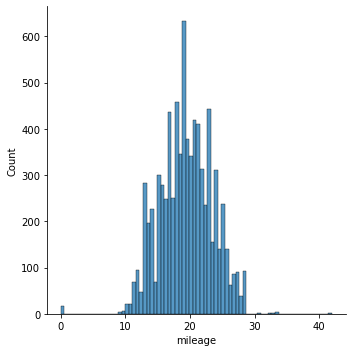

In [20]:
# Checking the distribution of mileage
sns.displot(data=df, x='mileage')

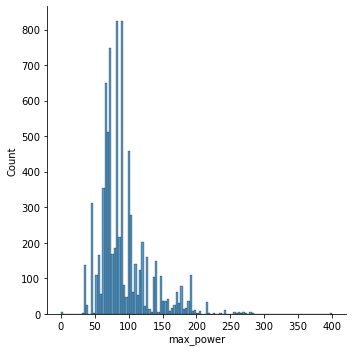

In [21]:
# Checking the distribution of max_power
sns.displot(data=df, x='max_power')

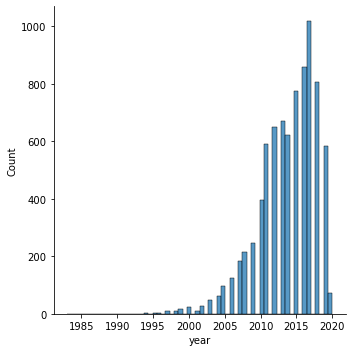

In [22]:
# Checking the distribution of max_power
sns.displot(data=df, x='year')

In [23]:
#let's fill the training set first!

X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['year'].fillna(X_train['year'].median(), inplace=True)

C:\Users\pirun\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [24]:
#let's fill the testing set with the training distribution first!

X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['year'].fillna(X_train['year'].median(), inplace=True)

In [25]:
#check again
X_train[['year','max_power','mileage']].isna().sum()

year         0
max_power    0
mileage      0
dtype: int64

In [26]:
X_train['mileage'].mean()

19.41427667428377

In [27]:
X_train['mileage'].std()

3.965679176460303

In [28]:
X_train['mileage'].max()

33.44

In [29]:
X_train['mileage'].min()

0.0

In [30]:
X_train['year'].min()

1983

In [31]:
X_train['year'].max()

2020

Checking Outlier

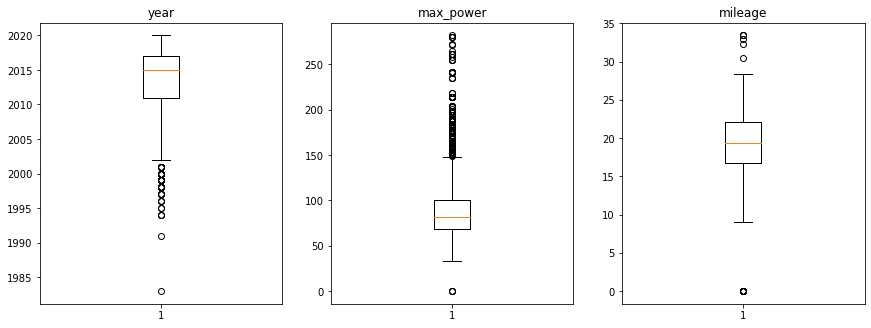

In [32]:
import matplotlib.pyplot as plt

# Create a dictionary of columns.
col_dict = {'year':1,'max_power':2,'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [33]:
def outlier_count(col, data=X_train):
    try:
        q75, q25 = np.percentile(data[col], [75, 25])
        iqr = q75 - q25
        min_val = q25 - (iqr*1.5)
        max_val = q75 + (iqr*1.5)
        outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
        outlier_percent = round(outlier_count/len(data[col])*100, 2)

        if(outlier_count > 0):
            print("\n"+15*'-' + col + 15*'-'+"\n")
            print('Number of outliers: {}'.format(outlier_count))
            print('Percent of data that is outlier: {}%'.format(outlier_percent))
    except Exception as e:
        print(f"Error processing column {col}: {str(e)}")

In [34]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    outlier_count(col)


---------------year---------------

Number of outliers: 55
Percent of data that is outlier: 0.97%

---------------max_power---------------

Number of outliers: 421
Percent of data that is outlier: 7.4%

---------------mileage---------------

Number of outliers: 19
Percent of data that is outlier: 0.33%


Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [36]:
# Initialize the scalers
minmax_scaler = MinMaxScaler()

In [37]:
X_train[['max_power', 'year']] = minmax_scaler.fit_transform(X_train[['max_power', 'year']])

<ipython-input-37-35c69067bcce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['max_power', 'year']] = minmax_scaler.fit_transform(X_train[['max_power', 'year']])
C:\Users\pirun\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [38]:
# Initialize the scalers
zscore_scaler = StandardScaler()

X_train['mileage']  = zscore_scaler.fit_transform(np.array(X_train['mileage']).reshape(-1,1))

<ipython-input-38-6ab514a4300d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['mileage']  = zscore_scaler.fit_transform(np.array(X_train['mileage']).reshape(-1,1))


In [39]:
# Transform test data using the scalers fitted on training data (DO NOT fit the scaler on the test data)

X_test[['max_power','year']] = minmax_scaler.transform(X_test[['max_power','year']])
X_test['mileage'] = zscore_scaler.transform(np.array(X_test['mileage']).reshape(-1, 1))


<ipython-input-39-7ed5f3372fe5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['max_power','year']] = minmax_scaler.transform(X_test[['max_power','year']])
C:\Users\pirun\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-39-7ed5f3372fe5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [40]:
# Scaling the Selling_Price by using log scale
y_train = np.log(y_train)
y_test = np.log(y_test)

In [41]:
y_train[:10]

6783    11.608236
1073    14.893920
7756    14.897316
144     13.345507
6424    12.886641
1340    12.660328
3044    12.847927
5666    13.337475
2091    13.910821
7953    13.217674
Name: selling_price, dtype: float64

In [42]:
y_test[:10]

1971    12.196022
4664    13.122363
5448    12.959844
3333    11.918391
2316    13.171154
6870    11.982929
5953    13.017003
2418    13.253392
1811    12.043554
3608    11.813030
Name: selling_price, dtype: float64

In [43]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5689, 3)
Shape of X_test:  (2439, 3)
Shape of y_train:  (5689,)
Shape of y_test:  (2439,)


**Modeling**

Using LinearRegression

In [44]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.11458124576554521
r2:  0.8370184373116625


Using RandomForest

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)  # I've set n_estimators to 100 as an example

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the test data
yhat_rf = rf.predict(X_test)

# Print the metrics
print("MSE: ", mean_squared_error(y_test, yhat_rf))
print("r2: ", r2_score(y_test, yhat_rf))


MSE:  0.05173509080055783
r2:  0.9264114656097286


Cross validation + Grid search

In [46]:
from sklearn.linear_model import LinearRegression  # We are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Libraries for model evaluation

# Models that we will be using, put them in a list
algorithms = [LinearRegression(),
              SVR(),
              KNeighborsRegressor(),
              DecisionTreeRegressor(random_state = 0),
              RandomForestRegressor(n_estimators = 100, random_state = 0),
              ]  # Added XGBoost regressor here

# The names of the models
algorithm_names = ["Linear Regression",
                   "SVR",
                   "KNeighbors Regressor",
                   "Decision-Tree Regressor",
                   "Random-Forest Regressor",
                  ]  # Added XGBoost regressor name here


In [47]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}\n\n\n\n")

Linear Regression - Score: [-0.12304448 -0.10807102 -0.115764   -0.11244897 -0.12728741]; Mean: -0.11732317562112257




SVR - Score: [-0.10952094 -0.11306227 -0.10053849 -0.09599702 -0.09735633]; Mean: -0.1032950100556819




KNeighbors Regressor - Score: [-0.06453644 -0.07052041 -0.07389186 -0.06823036 -0.07493241]; Mean: -0.07042229257659248




Decision-Tree Regressor - Score: [-0.06585706 -0.07537098 -0.07595732 -0.0666188  -0.06516458]; Mean: -0.0697937476348112




Random-Forest Regressor - Score: [-0.05581053 -0.04947514 -0.05609832 -0.06504005 -0.05758869]; Mean: -0.05680254799869309






Grid Search

In [48]:

from sklearn.model_selection import GridSearchCV

# Define a parameter grid for XGBoost
param_grid_rf = {
    'n_estimators': [5,  7, 10],
    'max_depth': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
R = RandomForestRegressor(random_state=0)

# Create the GridSearchCV object
grid = GridSearchCV(estimator=R,
                    param_grid=param_grid_rf,
                    cv=kfold,  # Assuming 'kfold' has been previously defined
                    n_jobs=-1,
                    return_train_score=True,
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit the GridSearchCV
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 7, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 10}

In [50]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [51]:
best_mse  # ignore the minus because it's neg_mean_squared_error

-0.05620050947284757

**Testing**

In [52]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.05414871392386407

In [53]:
print("r2 for the testing:",r2_score(y_test, yhat))

r2 for the testing: 0.9229783028286042


**Analysis of Feature Important**

Algorithm way

In [54]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.41441512, 0.43607801, 0.14950687])

<BarContainer object of 3 artists>

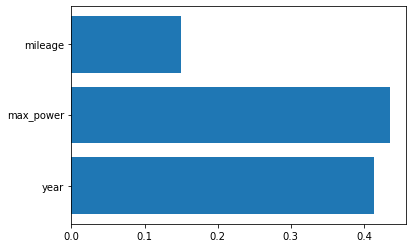

In [55]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

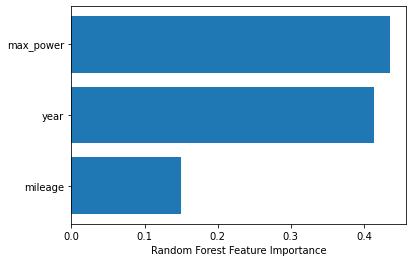

In [56]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Permutation way

Text(0.5, 0, 'Random Forest Feature Importance')

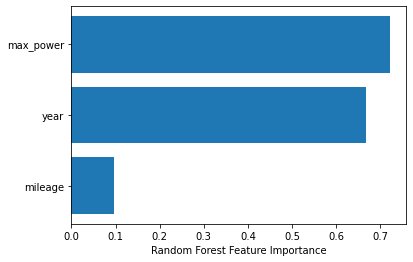

In [57]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, yhat)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 0.1585453104371007
MSE: 0.05414871392386407
RMSE: 0.23269876218807883
R-squared: 0.9229783028286042


Shap way

In [99]:
!pip install shap

In [100]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


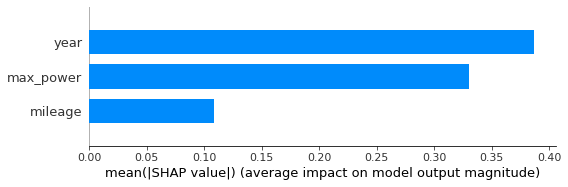

In [101]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

# Inference

In [102]:
import joblib

model_path = 'C:\\Users\\pirun\\OneDrive\\Desktop\\app\\app\\car-pridiction.model'
joblib.dump(grid, model_path)

['C:\\Users\\pirun\\OneDrive\\Desktop\\app\\app\\car-pridiction.model']

In [103]:
# Load the model

model_path =  'C:\\Users\\pirun\\OneDrive\\Desktop\\app\\app\\car-pridiction.model'
loaded_model = joblib.load(model_path)

In [104]:
# Define the sample data
sample_data = np.array([[0.4, 0.9,0.3]])

# Convert to DataFrame with feature names
sample_df = pd.DataFrame(sample_data, columns=['year','max_power','mileage'])

In [105]:
# Predict

predictions = loaded_model.predict(sample_df)
np.exp(predictions[0])

932058.2467845705